# CONVOLUTION NEURAL NETWORK

In [48]:
import tensorflow as tf
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt

In [19]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 1)

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [37]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [34]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [41]:
def showImage(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(y_classes[y[index]])

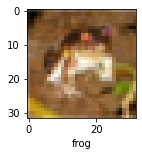

In [42]:
showImage(X_train, y_train, 0)

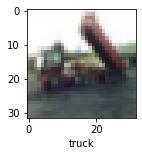

In [44]:
showImage(X_train, y_train, 2)

### Normalization

In [45]:
X_train = X_train / 255
X_test = X_test / 255

In [46]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## MODEL

In [58]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape= (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (2, 2), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2))) 
          
model.add(Flatten())
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

In [59]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [60]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5750 - accuracy: 0.4267 - val_loss: 1.3376 - val_accuracy: 0.5172
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.2601 - accuracy: 0.5514 - val_loss: 1.2067 - val_accuracy: 0.5733
Epoch 3/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1339 - accuracy: 0.5988 - val_loss: 1.1231 - val_accuracy: 0.6072
Epoch 4/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0429 - accuracy: 0.6313 - val_loss: 1.0132 - val_accuracy: 0.6460
Epoch 5/5
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9700 - accuracy: 0.6616 - val_loss: 1.0450 - val_accuracy: 0.6319


In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.0450 - accuracy: 0.6319


[1.0450383424758911, 0.6319000124931335]

In [62]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [65]:
y_test = y_test.reshape(-1,)

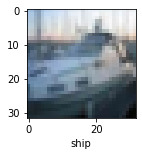

In [66]:
showImage(X_test, y_test, 2)

In [68]:
y_pred = model.predict(X_test)

In [69]:
y_pred[2]

array([1.6487360e-01, 2.5150055e-01, 1.0696338e-02, 3.9442894e-03,
       1.1957117e-03, 1.3290166e-03, 2.3336391e-04, 4.1932575e-04,
       5.0289524e-01, 6.2912598e-02], dtype=float32)

In [71]:
y_predicted = [np.argmax(arr) for arr in y_pred]

In [73]:
y_predicted[2]

8

In [74]:
y_test[2]

8

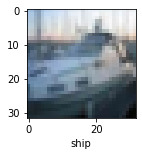

In [75]:
showImage(X_test, y_test, 2)

In [78]:
y_classes[8]

'ship'

In [79]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1000
           1       0.77      0.77      0.77      1000
           2       0.42      0.64      0.51      1000
           3       0.46      0.49      0.47      1000
           4       0.75      0.35      0.48      1000
           5       0.56      0.51      0.53      1000
           6       0.69      0.81      0.74      1000
           7       0.82      0.59      0.69      1000
           8       0.66      0.81      0.73      1000
           9       0.79      0.65      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.66      0.63      0.63     10000
weighted avg       0.66      0.63      0.63     10000



In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm = confusion_matrix(y_test, y_predicted)

In [85]:
import seaborn as sns

<AxesSubplot:>

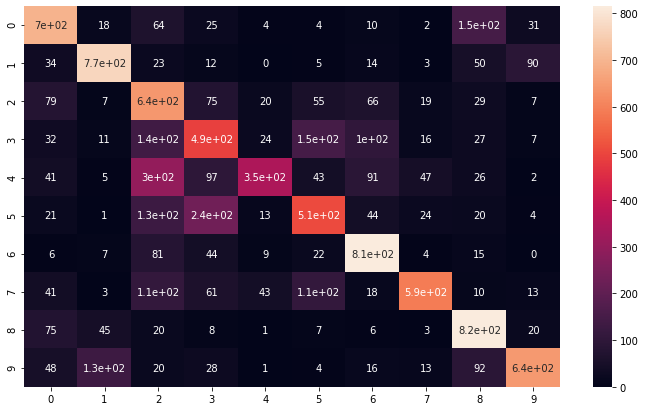

In [87]:
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True)